# Dark photon summary plots

This notebook makes summary plots from analytical rescalings of dijet resonance search limits for $Z'$ mediators in simplified dark matter models. The dark photon re-scaling relies on the methods defined in `modules/dark_photon.py` and ingests the output of that script.

In [14]:
# import useful packages
import mplhep as hep
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib as mpl

In [12]:
import sys
sys.path.append("..")  # to allow imports from parent directory
from modules.benchmarks import benchmarks
from modules.dark_photon import calculate_epsilon, compute_yield_parameter

In [63]:
# this defines what inputs to use
inputs = [
    {
        "label": "ATLAS Run 2 Dijet TLA" + "\n" + "PRD 112, 092015 (2025)\n" + r"$\sqrt{s} = 13$ TeV, 140 fb$^{-1}$",
        "input_file_observed": "../outputs/TLADijetRun2_J100_observed_darkPhoton.json",
    },
    # configure more inputs here as needed
]

benchmark_name = "minimal_dark_photon"

# whether to annotate the plots with additional lines
annotate_plots = False
annotation_points = [
    {"gq": 0.03, "color": "darkred", "linestyle": (5, (10, 3)), "label": "$g_q = 0.03$"},
    {"gq": 0.02, "color": "darkslategrey", "linestyle": "-.", "label": "$g_q = 0.02$"},
    {"gq": 0.01, "color": "darkolivegreen", "linestyle": ":", "label": "$g_q = 0.01$"},
]

In [64]:
# define a method for plotting the reference points
def plot_reference_points(points:list, legend_handles:list, legend_labels:list, ax:mpl.axes.Axes, benchmark_name:str, linewidth:float=2.0):
    x_limit_min, x_limit_max = ax.get_xlim()
    mmed_ref = np.linspace(x_limit_min, x_limit_max, 1000)

    # get benchmark info
    gdm = benchmarks[benchmark_name]["parameters"]["gdm"]
    mdm_frac = benchmarks[benchmark_name]["parameters"]["mdm_fraction"]

    # plot the points and append info to the legend
    for point in points:
        y_ref = compute_yield_parameter(mmed_ref, mmed_ref * mdm_frac, np.ones_like(mmed_ref) * point["gq"], gdm=gdm)
        ax.plot(mmed_ref, y_ref, color=point["color"], linestyle=point["linestyle"], label=point["label"], linewidth=linewidth)
        legend_labels.append(point["label"])
        legend_handles.append(plt.Line2D([], [], color=point["color"], linestyle=point["linestyle"], linewidth=linewidth))

    return
    

In [65]:
# this defines the plot style to use
# for now just use the ATLAS style (can be changed later)
hep.style.use("ATLAS")

## Limits on yield parameter $y$ vs. dark photon mass

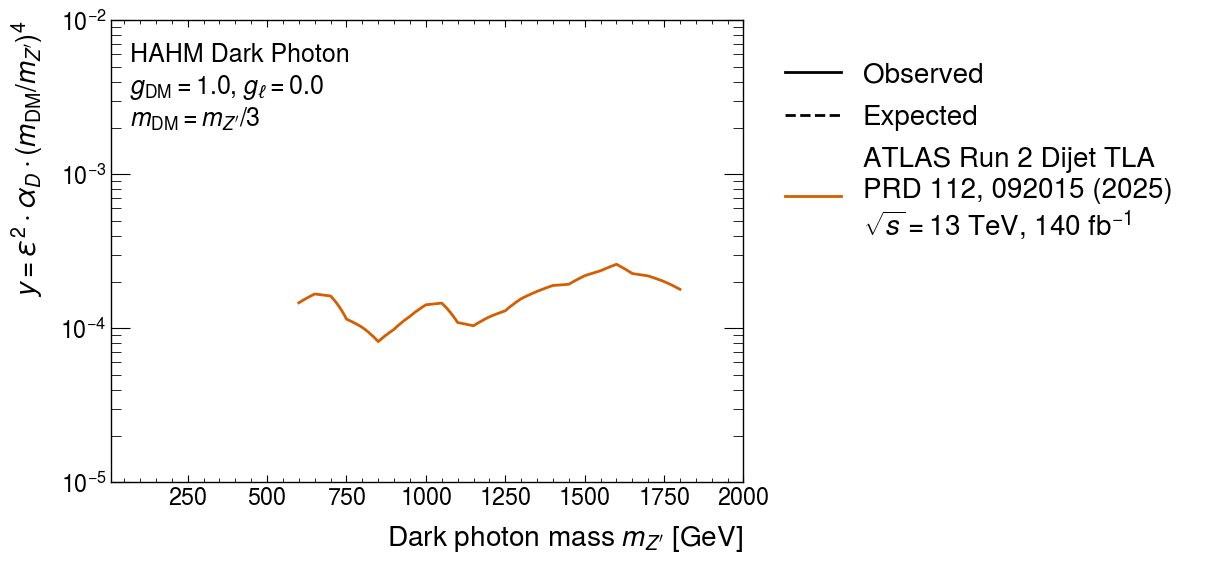

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
legend_handles = [
    plt.Line2D([], [], color="k", linestyle="-", lw=2),
    plt.Line2D([], [], color="k", linestyle="--", lw=2),
]
legend_labels = [
    "Observed",
    "Expected",
]

data_dict = dict()
for idx, input_cfg in enumerate(inputs):
    # add to legend handles and labels
    legend_labels.append(input_cfg["label"])
    legend_handles.append(plt.Line2D([], [], color=f"C{idx}", lw=2))

    # load the data 
    with open(input_cfg["input_file_observed"], "r") as f:
        data_dict = json.load(f)

    # extract the observed dark photon limits
    for mmed, y_lim in zip(data_dict["mmed"], data_dict["y_limit"]):
        # plot the contours for the limit
        ax.plot(
            mmed,
            y_lim,
            color=f"C{idx}",
            lw=2
        )

    # # do the same for the expected limits
    # with open(input_cfg["input_file_expected"], "r") as f:
    #     data_dict = json.load(f)

    # for mmed, y_lim in zip(data_dict["mmed"], data_dict["y_limit"]):
    #     # plot the contours for the limit
    #     ax.plot(
    #         mmed,
    #         y_lim,
    #         color=f"C{idx}",
    #         linestyle="--",
    #     )


# format the plot
ax.set_yscale("log")
ax.set_xlim(10, 2000)
ax.set_xlabel(r"Dark photon mass $m_{Z'}$ [GeV]")
ax.set_ylabel(r"$y = \epsilon^2 \cdot \alpha_D \cdot (m_{\mathrm{DM}}/ m_{Z'})^4$")
ax.set_ylim(top=1e-2)

# annotations
if annotate_plots:
    plot_reference_points(annotation_points, legend_handles, legend_labels, ax, benchmark_name)
    ax.set_ylim(bottom=1e-7)

# add a legend
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    bbox_to_anchor=(1.0, 1.0),
    loc="upper left",
    labelspacing=0.6,
    fontsize=20
)

# setup plot text
plot_text = (
    benchmarks[benchmark_name]["name"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["coupling_label"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["mdm_label"]
)
_ = ax.text(
    0.03, 
    0.95, 
    plot_text, 
    transform=ax.transAxes, 
    fontsize=18, 
    va='top', 
    ha='left'
)
plt.savefig("../outputs/y_vs_mmed_summary_plot.pdf", bbox_inches='tight')

## Limits on yield parameter $y$ vs. dark matter mass

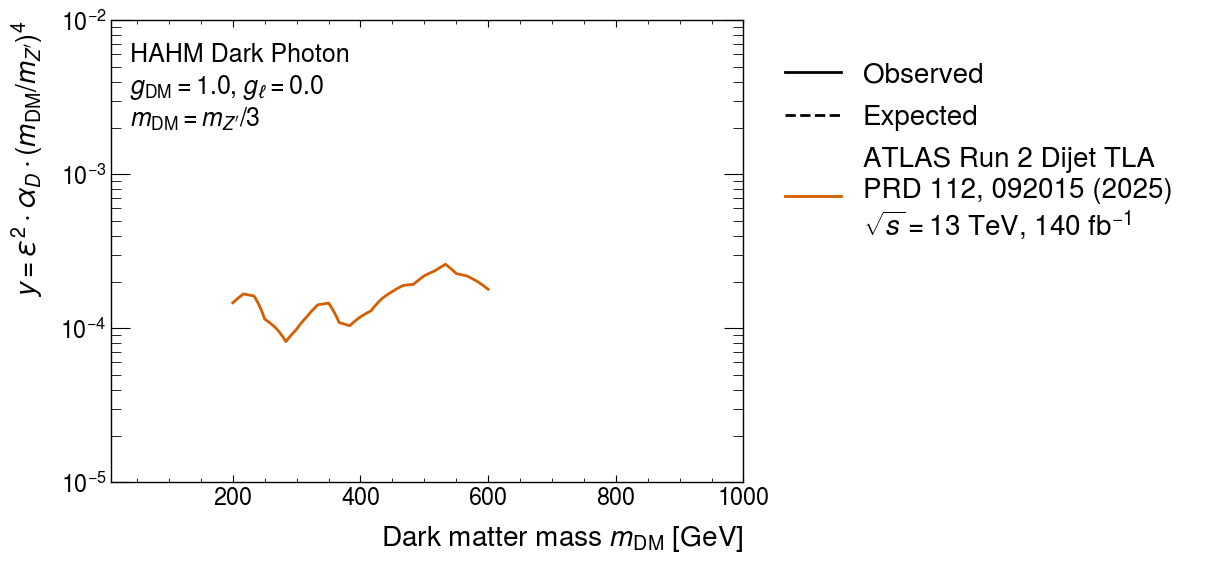

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
legend_handles = [
    plt.Line2D([], [], color="k", linestyle="-", lw=2),
    plt.Line2D([], [], color="k", linestyle="--", lw=2),
]
legend_labels = [
    "Observed",
    "Expected",
]
mdm_frac = benchmarks[benchmark_name]["parameters"]["mdm_fraction"]

data_dict = dict()
for idx, input_cfg in enumerate(inputs):
    # add to legend handles and labels
    legend_labels.append(input_cfg["label"])
    legend_handles.append(plt.Line2D([], [], color=f"C{idx}", lw=2))

    # load the data 
    with open(input_cfg["input_file_observed"], "r") as f:
        data_dict = json.load(f)

    # extract the observed dark photon limits
    for mmed, y_lim in zip(data_dict["mmed"], data_dict["y_limit"]):
        
        # plot the contours for the limit
        ax.plot(
            np.array(mmed) * mdm_frac, # conversion to mdm
            y_lim,
            color=f"C{idx}",
            lw=2
        )

    # # do the same for the expected limits
    # with open(input_cfg["input_file_expected"], "r") as f:
    #     data_dict = json.load(f)

    # for mmed, y_lim in zip(data_dict["mmed"], data_dict["y_limit"]):
    #     # plot the contours for the limit
    #     ax.plot(
    #         np.array(mmed) * mdm_frac, # conversion to mdm
    #         y_lim,
    #         color=f"C{idx}",
    #         linestyle="--",
    #     )


# format the plot
ax.set_yscale("log")
ax.set_xlim(10, 1000)
ax.set_xlabel(r"Dark matter mass $m_{\mathrm{DM}}$ [GeV]")
ax.set_ylabel(r"$y = \epsilon^2 \cdot \alpha_D \cdot (m_{\mathrm{DM}}/ m_{Z'})^4$")
ax.set_ylim(top=1e-2)

# annotations
if annotate_plots:
    plot_reference_points(annotation_points, legend_handles, legend_labels, ax, benchmark_name)
    ax.set_ylim(bottom=1e-7)

# add a legend
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    bbox_to_anchor=(1.0, 1.0),
    loc="upper left",
    labelspacing=0.6,
    fontsize=20
)

# setup plot text
plot_text = (
    benchmarks[benchmark_name]["name"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["coupling_label"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["mdm_label"]
)
_ = ax.text(
    0.03, 
    0.95, 
    plot_text, 
    transform=ax.transAxes, 
    fontsize=18, 
    va='top', 
    ha='left'
)
plt.savefig("../outputs/y_vs_mdm_summary_plot.pdf", bbox_inches='tight')

## Limits on mixing parameter $\epsilon^2$ vs. dark matter mass

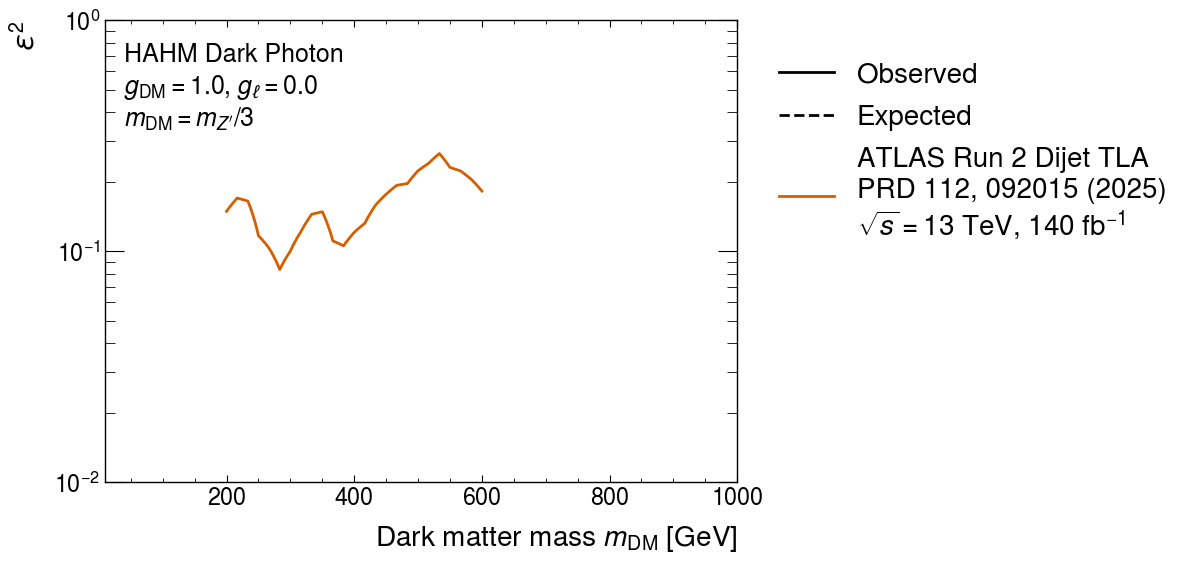

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))
legend_handles = [
    plt.Line2D([], [], color="k", linestyle="-", lw=2),
    plt.Line2D([], [], color="k", linestyle="--", lw=2),
]
legend_labels = [
    "Observed",
    "Expected",
]
mdm_frac = benchmarks[benchmark_name]["parameters"]["mdm_fraction"]

data_dict = dict()
for idx, input_cfg in enumerate(inputs):
    # add to legend handles and labels
    legend_labels.append(input_cfg["label"])
    legend_handles.append(plt.Line2D([], [], color=f"C{idx}", lw=2))

    # load the data 
    with open(input_cfg["input_file_observed"], "r") as f:
        data_dict = json.load(f)

    # extract the observed dark photon limits
    for mmed, eps_lim in zip(data_dict["mmed"], data_dict["epsilon_limit"]):
        
        # plot the contours for the limit
        ax.plot(
            np.array(mmed) * mdm_frac, # conversion to mdm
            np.array(eps_lim)**2,
            color=f"C{idx}",
            lw=2
        )

    # # do the same for the expected limits
    # with open(input_cfg["input_file_expected"], "r") as f:
    #     data_dict = json.load(f)

    # for mmed, eps_lim in zip(data_dict["mmed"], data_dict["epsilon_limit"]):
    #     # plot the contours for the limit
    #     ax.plot(
    #         np.array(mmed) * mdm_frac, # conversion to mdm
    #         np.array(eps_lim)**2,
    #         color=f"C{idx}",
    #         linestyle="--",
    #     )


# format the plot
ax.set_yscale("log")
ax.set_xlim(10, 1000)
ax.set_xlabel(r"Dark matter mass $m_{\mathrm{DM}}$ [GeV]")
ax.set_ylabel(r"$\epsilon^2$")
ax.set_ylim(top=1e0)

# annotations
if annotate_plots:
    plot_reference_points(annotation_points, legend_handles, legend_labels, ax, benchmark_name)
    ax.set_ylim(bottom=1e-7)

# add a legend
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    bbox_to_anchor=(1.0, 1.0),
    loc="upper left",
    labelspacing=0.6,
    fontsize=20
)

# setup plot text
plot_text = (
    benchmarks[benchmark_name]["name"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["coupling_label"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["mdm_label"]
)
_ = ax.text(
    0.03, 
    0.95, 
    plot_text, 
    transform=ax.transAxes, 
    fontsize=18, 
    va='top', 
    ha='left'
)
plt.savefig("../outputs/eps_vs_mdm_summary_plot.pdf", bbox_inches='tight')

## Limits on mixing parameter $\epsilon^2$ vs. dark photon mass

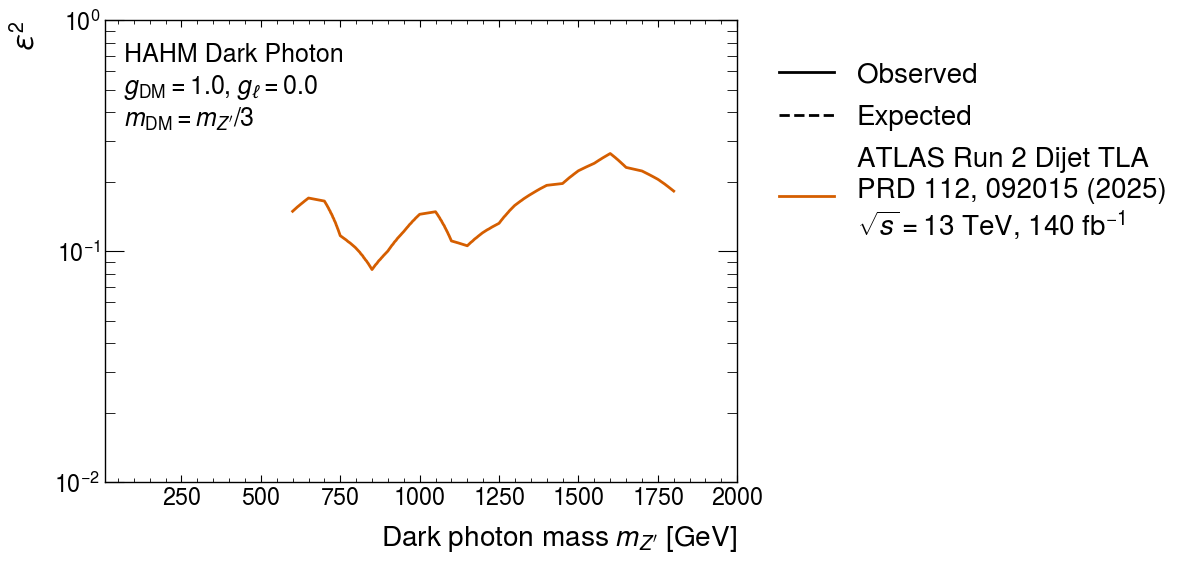

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
legend_handles = [
    plt.Line2D([], [], color="k", linestyle="-", lw=2),
    plt.Line2D([], [], color="k", linestyle="--", lw=2),
]
legend_labels = [
    "Observed",
    "Expected",
]

data_dict = dict()
for idx, input_cfg in enumerate(inputs):
    # add to legend handles and labels
    legend_labels.append(input_cfg["label"])
    legend_handles.append(plt.Line2D([], [], color=f"C{idx}", lw=2))

    # load the data 
    with open(input_cfg["input_file_observed"], "r") as f:
        data_dict = json.load(f)

    # extract the observed dark photon limits
    for mmed, eps_lim in zip(data_dict["mmed"], data_dict["epsilon_limit"]):
        
        # plot the contours for the limit
        ax.plot(
            mmed,
            np.array(eps_lim)**2,
            color=f"C{idx}",
            lw=2
        )

    # # do the same for the expected limits
    # with open(input_cfg["input_file_expected"], "r") as f:
    #     data_dict = json.load(f)

    # for mmed, eps_lim in zip(data_dict["mmed"], data_dict["epsilon_limit"]):
    #     # plot the contours for the limit
    #     ax.plot(
    #         mmed,
    #         np.array(eps_lim)**2,
    #         color=f"C{idx}",
    #         linestyle="--",
    #     )


# format the plot
ax.set_yscale("log")
ax.set_xlim(10, 2000)
ax.set_xlabel(r"Dark photon mass $m_{Z'}$ [GeV]")
ax.set_ylabel(r"$\epsilon^2$")
ax.set_ylim(top=1e0)

# annotations
if annotate_plots:
    plot_reference_points(annotation_points, legend_handles, legend_labels, ax, benchmark_name)
    ax.set_ylim(bottom=1e-7)

# add a legend
ax.legend(
    handles=legend_handles,
    labels=legend_labels,
    bbox_to_anchor=(1.0, 1.0),
    loc="upper left",
    labelspacing=0.6,
    fontsize=20
)

# setup plot text
plot_text = (
    benchmarks[benchmark_name]["name"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["coupling_label"] + "\n" + 
    benchmarks[benchmark_name]["plot_parameters"]["mdm_label"]
)
_ = ax.text(
    0.03, 
    0.95, 
    plot_text, 
    transform=ax.transAxes, 
    fontsize=18, 
    va='top', 
    ha='left'
)
plt.savefig("../outputs/eps_vs_mmed_summary_plot.pdf", bbox_inches='tight')